In [1]:
# Dependencies
import json
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Setup API Key
from config import api_key

# Import citipy to generate cities
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.

In [2]:
# Create lists to hold coordinates and cities
coord = []
cities = []

# Create random set of latitiudes and longitudes and put them in coord[]
lat = np.random.uniform(low=-90.000, high=90.000, size=1500)
lng = np.random.uniform(low=-180.000, high=180.000, size=1500)
coord = zip(lat, lng)

# Id the nearest city for each coordinate
for x in coord:
    city = citipy.nearest_city(x[0], x[1]).city_name
    
    # Append the city into list if it's not already in
    if city not in cities:
        cities.append(city)

# Visualize and make sure we have 500+ cities
print(len(cities))

594


### Perform a weather check on each of the cities using a series of successive API calls.
### Include a print log of each city as it's being processed with the city number and city name.

In [3]:
# Build url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key


# Create empty lists to append datas
city_name = []
cloudiness = []
country = []
date = []
hum = []
lats = []
lngs = []
max_temp = []
wind_spd = []

# Set city number counter for data retrieval log 
counter = 1

# Print data retrieval log
print(f"Retrieving Data")
print(f"Printing logs")
print(f"---------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Implementing try statement in case cities generated are not available 
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        hum.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lats.append(response["coord"]["lat"])
        lngs.append(response["coord"]["lon"])
        wind_spd.append(response["wind"]["speed"])
        city_num_name = response["name"]

        print(f"Processing city number {counter} | {city_num_name}")
        print(f"{url}&q={city}")
        
        
        counter= counter + 1
        
        # Counter the rate limit of API # Need to revisit
        time.sleep(2)
        
    # Except statment if OpenWeather doesn't have the cities we want
    except:
        print("City not available, skipping")

    continue

skipping
Processing city number 444 | Morros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b51fa59ea52ed7b86c307d01e28cc1b0&q=morros
City not available, skipping
Processing city number 445 | Kargil
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b51fa59ea52ed7b86c307d01e28cc1b0&q=kargil
City not available, skipping
Processing city number 446 | Raudeberg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b51fa59ea52ed7b86c307d01e28cc1b0&q=raudeberg
City not available, skipping
City not available, skipping
Processing city number 447 | Igarka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b51fa59ea52ed7b86c307d01e28cc1b0&q=igarka
City not available, skipping
Processing city number 448 | Abu Dhabi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b51fa59ea52ed7b86c307d01e28cc1b0&q=abu dhabi
City not available, skipping
Processing city number 449 | Sitka
http://api.openweathermap.org/data/2.5/w

In [4]:
# Create a DataFrame with data collected to plot the graphs
weather_df = pd.DataFrame({
     "City": city_name,
     "Cloudiness": cloudiness,
     "Country": country,
     "Date": date,
     "Humidity": hum,
     "Latitude": lats,
     "longitude": lngs,
     "Max Temperature": max_temp,
     "Wind Speed": wind_spd,
     })

print(len(weather_df["City"]))     
weather_df.head()

553


,City,Cloudiness,Country,Date,Humidity,Latitude,longitude,Max Temperature,Wind Speed
0,Punta Arenas,75,CL,1605306611,65,-53.15,-70.92,44.60,23.04
1,Eyl,65,SO,1605306690,76,7.98,49.82,76.86,10.42
2,Port Hardy,75,CA,1605306113,93,50.70,-127.42,44.60,9.17
3,Nikolskoye,40,RU,1605306691,80,59.70,30.79,35.01,4.47
4,Kashgar,40,CN,1605306691,32,39.45,75.98,39.20,8.95


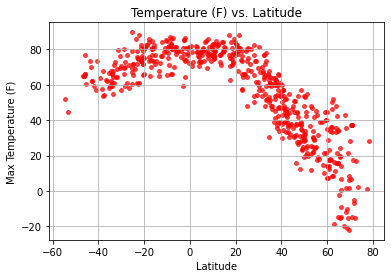

<Figure size 432x288 with 0 Axes>

In [29]:
# Scatter Plot: Temperature (F) vs. Latitude
plt.scatter(weather_df["Latitude"], weather_df["Max Temperature"], marker= "o", color= "r", alpha= 0.7, s= 15)
plt.title("Temperature (F) vs. Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()
plt.tight_layout()

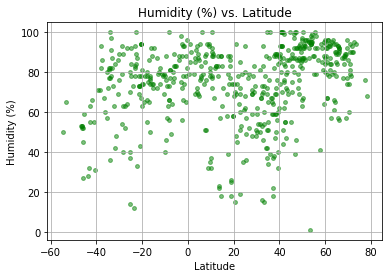

<Figure size 432x288 with 0 Axes>

In [28]:
# Scatter Plot: Humidity (%) vs. Latitude
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], marker= "o", color= "g", alpha= 0.5, s= 15)
plt.title("Humidity (%) vs. Latitude")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()
plt.tight_layout()

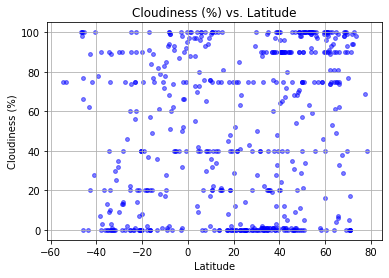

<Figure size 432x288 with 0 Axes>

In [27]:
# Scatter Plot: Cloudiness (%) vs. Latitude
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], marker= "o", color= "b", alpha= 0.5, s= 15)
plt.title("Cloudiness (%) vs. Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()
plt.tight_layout()

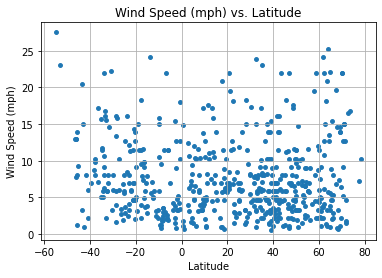

<Figure size 432x288 with 0 Axes>

In [24]:
# Scatter Plot: Wind Speed (mph) vs. Latitude
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], marker= "o", s= 15)
plt.title("Wind Speed (mph) vs. Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()
plt.tight_layout()